In [69]:
import tifffile

from matplotlib import pyplot as plt
%matplotlib inline

from skimage.metrics import structural_similarity as ssim
from skimage.metrics import normalized_mutual_information as nmi
from skimage.registration import optical_flow_ilk
from skimage.filters import gaussian
import numpy as np
from tqdm.auto import tqdm
from skimage.feature import canny
from skimage.filters import unsharp_mask, gaussian

from albumentations import RandomCrop
from src.augmentations import medium_aug_rot_float_atro, medium_aug_rot_float_atro_reco

In [2]:
a = tifffile.imread('/mnt/LSDF/projects/code-vita/BM_beamtimes/2022_02_P23/27-02/trichogramma/001/pr-pag-all/scan_0106-pr-pag-2p0.tif')

In [3]:
a.shape

(8997, 516, 787)

In [5]:
aug = RandomCrop(256, 256)

In [22]:
aug = medium_aug_rot_float_atro_reco

In [23]:
pairs = []
sims = []
for q in range(3):
    for i in tqdm(range(len(a)-1)):
        augged = aug(image=np.moveaxis(a[[i, i+1]]*1000, 0, -1))['image']
        a1 = augged[..., 0]
        a2 = augged[..., 1]
        pairs.append((a1, a2))
        sims.append(ssim(a1, a2))

  0%|          | 0/8996 [00:00<?, ?it/s]

  0%|          | 0/8996 [00:00<?, ?it/s]

  0%|          | 0/8996 [00:00<?, ?it/s]

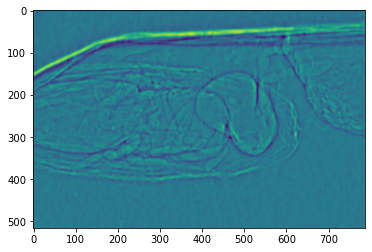

In [77]:
plt.imshow(a[0] - gaussian(a[0], sigma=5))

In [78]:
pairs = []
sims = []
for q in range(3):
    for i in tqdm(range(len(a)-1)):
        augged = aug(image=np.moveaxis(a[[i, i+1]]*1000, 0, -1))['image']
        a1 = augged[..., 0]
        a2 = augged[..., 1]
        pairs.append((a1, a2))
        sims.append(ssim(a1 - gaussian(a1, sigma=5), a2 - gaussian(a2, sigma=5)))

  0%|          | 0/8996 [00:00<?, ?it/s]

  0%|          | 0/8996 [00:00<?, ?it/s]

  0%|          | 0/8996 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [220]:
pairs = []
sims = []
for q in range(3):
    for i in tqdm(range(len(a)-1)):
        augged = aug(image=np.moveaxis(a[[0, 1]], 0, -1))['image']
        a1 = augged[..., 0]
        a2 = augged[..., 1]
        pairs.append((a1, a2))
        sims.append(ssim(canny(a1*1e4, sigma=5), canny(a2*1e4, sigma=5)))

  0%|          | 0/8996 [00:00<?, ?it/s]

  0%|          | 0/8996 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [183]:
pairs = []
sims = []
for q in range(3):
    for i in tqdm(range(len(a)-1)):
        augged = aug(image=np.moveaxis(a[[0, 1]], 0, -1))['image']
        a1 = augged[..., 0]
        a2 = augged[..., 1]
        pairs.append((a1, a2))
        sims.append(np.abs(optical_flow_ilk(gaussian(a1)*1e4, gaussian(a2)*1e4)).mean())

  0%|          | 0/8996 [00:00<?, ?it/s]

  0%|          | 0/8996 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [79]:
sims = np.array(sims)

In [222]:
np.percentile(sims, 12)

0.6547202771672729

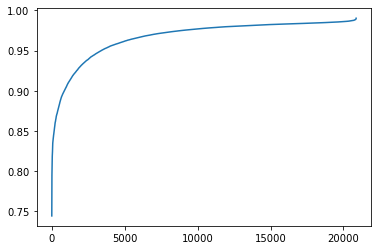

In [80]:
plt.plot(np.sort(sims))

In [95]:
ids_bad = np.arange(len(sims))[sims < 0.965]
len(ids_bad)/ len(sims)

0.2715948833421166

In [83]:
rset = np.random.randint(len(sims), size=16)

In [96]:
rset = np.random.choice(ids_bad, size=16)

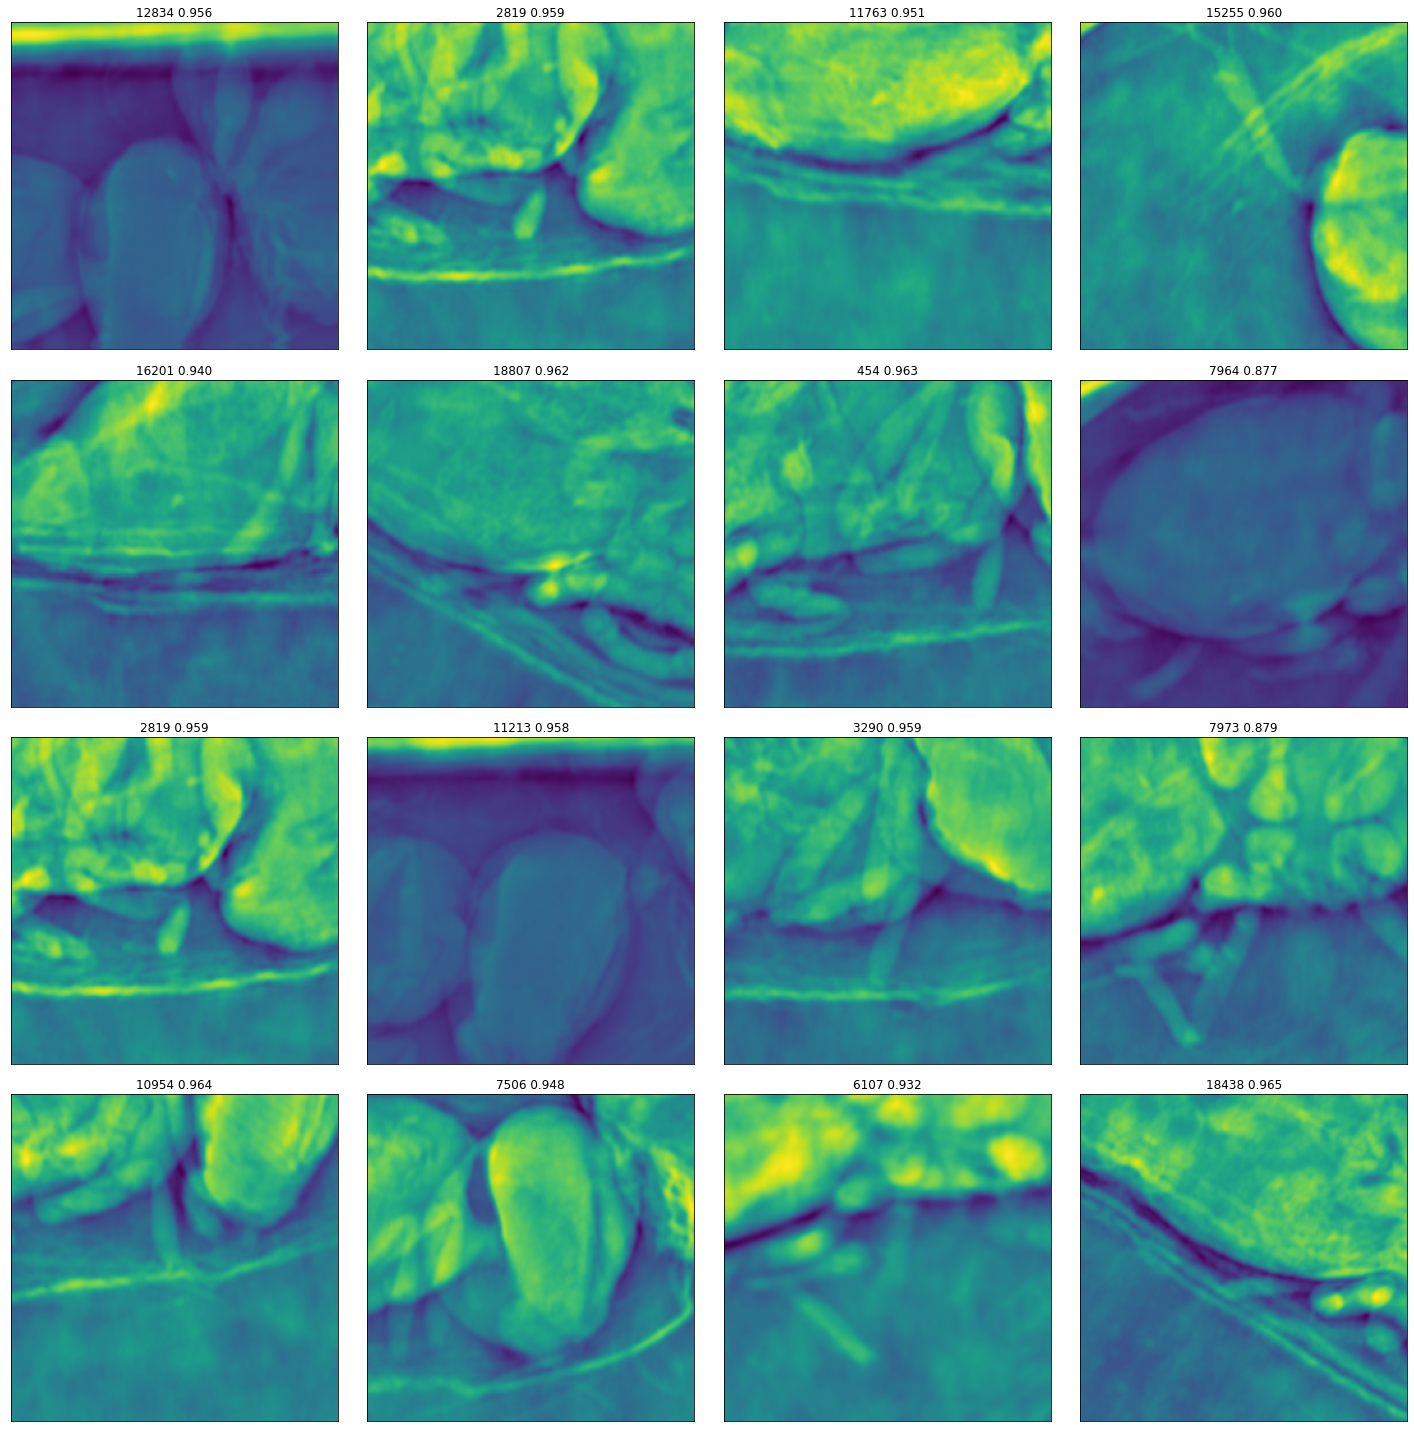

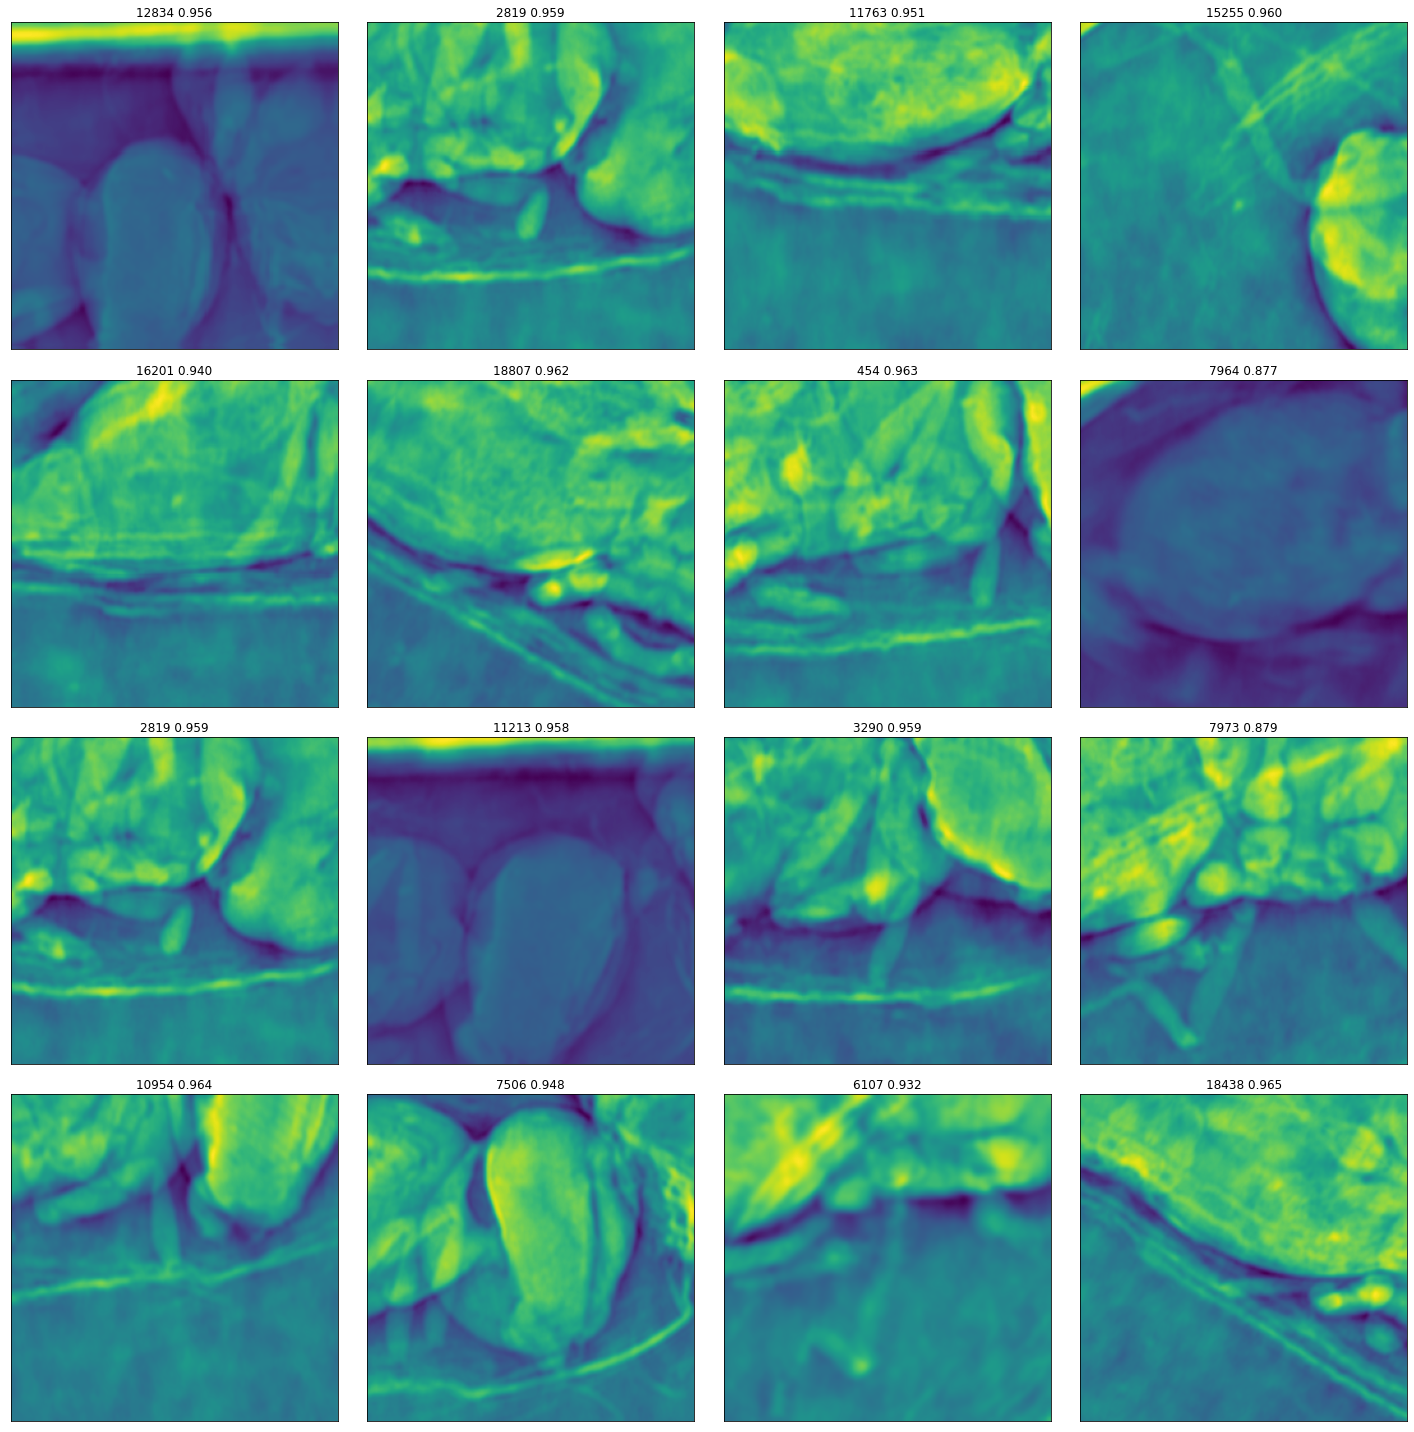

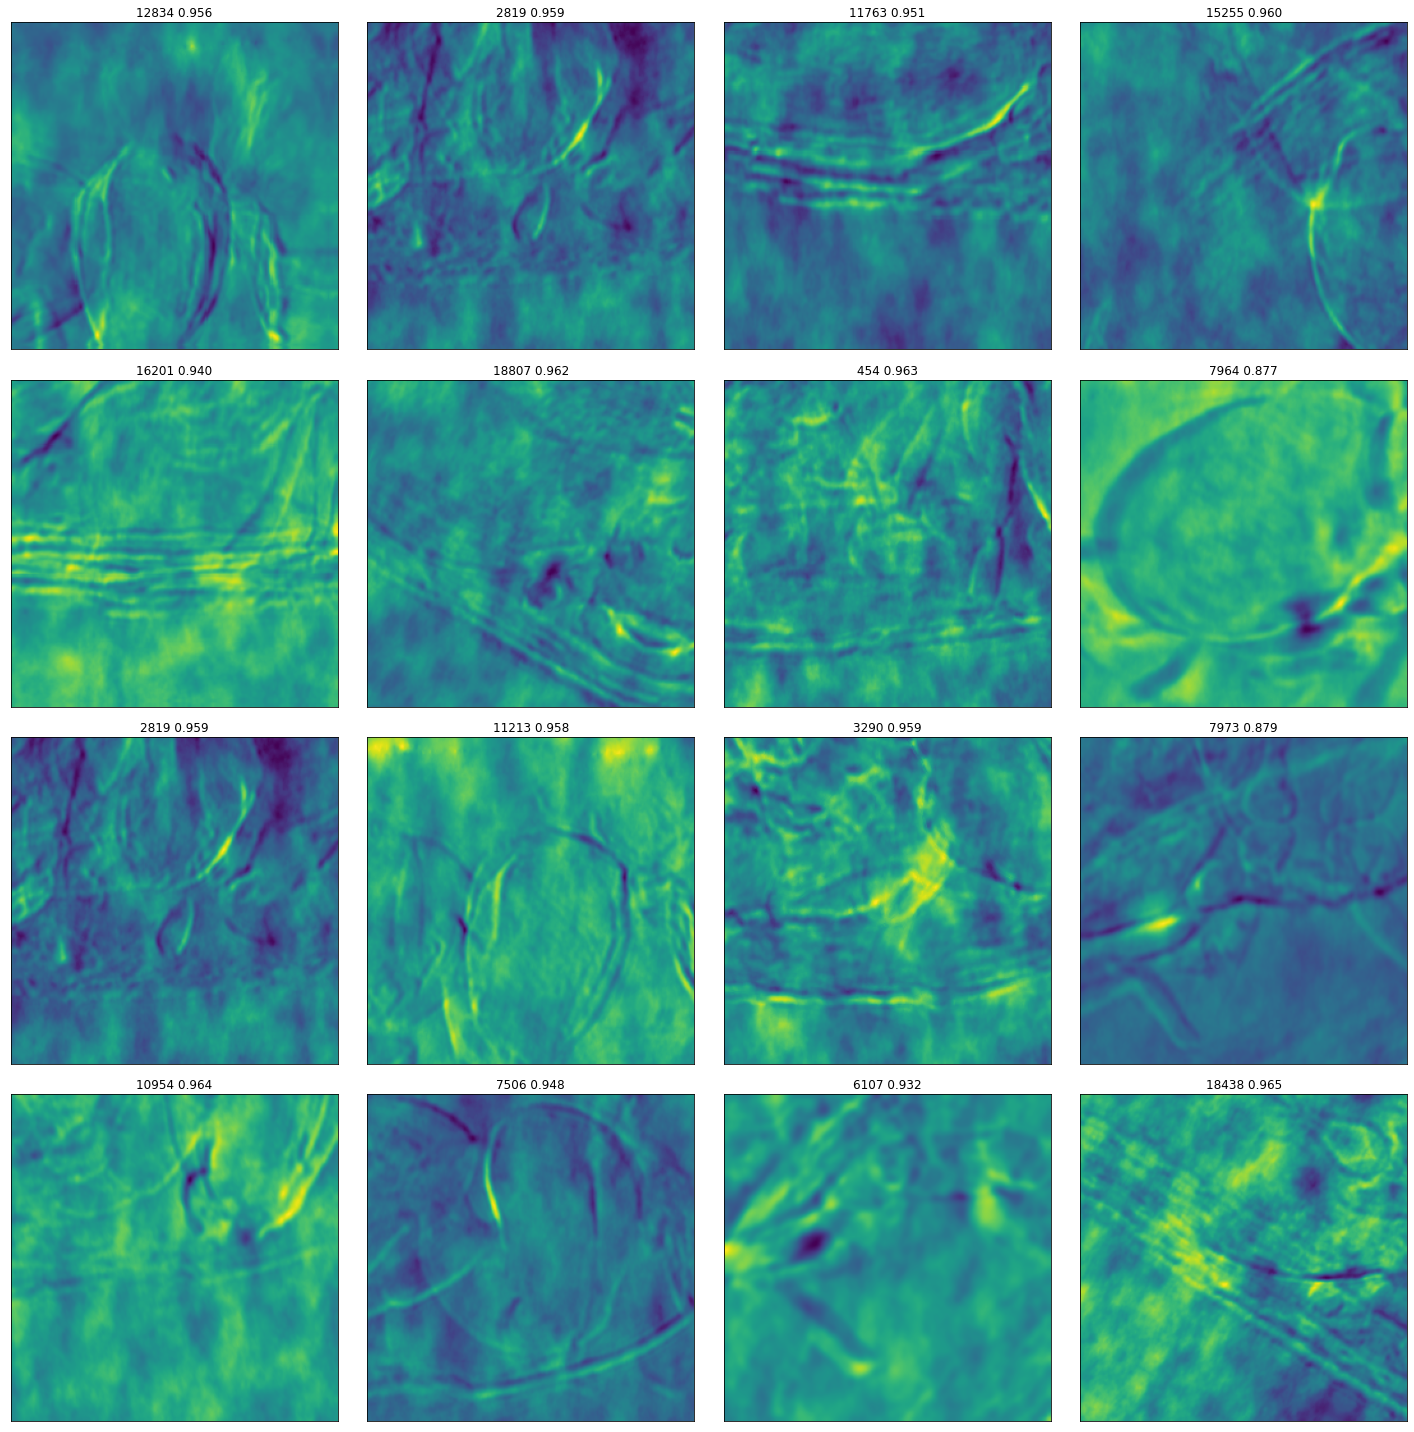

In [97]:
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(20, 20))
for i, id in enumerate(rset):
    cax = axes[i//4][i%4]
    cax.imshow(pairs[id][1])
    cax.set_title(f'{id} {sims[id]:.3f}' )
    cax.set_xticks([])
    cax.set_yticks([])
plt.tight_layout()
plt.savefig('c0.png')

fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(20, 20))
for i, id in enumerate(rset):
    cax = axes[i//4][i%4]
    cax.imshow(pairs[id][0])
    cax.set_title(f'{id} {sims[id]:.3f}' )
    cax.set_xticks([])
    cax.set_yticks([])
plt.tight_layout()
plt.savefig('c1.png')

fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(20, 20))
for i, id in enumerate(rset):
    cax = axes[i//4][i%4]
    cax.imshow(pairs[id][0] - pairs[id][1])
    cax.set_title(f'{id} {sims[id]:.3f}' )
    cax.set_xticks([])
    cax.set_yticks([])
plt.tight_layout()

!convert -delay 2 -loop 0 c0.png c1.png compare.gif

(array([1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.]),
 array([0.78633654, 0.79246733, 0.79859812, 0.8047289 , 0.81085969,
        0.81699048, 0.82312127, 0.82925206, 0.83538285, 0.84151364,
        0.84764443, 0.85377522, 0.85990601, 0.8660368 , 0.87216759,
        0.87829838, 0.88442917, 0.89055996, 0.89669075, 0.90282154,
        0.90895233]),
 <BarContainer object of 20 artists>)

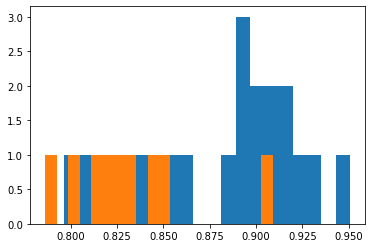

In [76]:
plt.hist(sims[[888, 13779, 9108, 11475, 17852, 11587, 18774, 318, 8043, 14148, 19048, 1013, 18428, 4933, 18178, 14504, 2164, 16346, 11873, 4064, 9014, 20804]], bins=20)
plt.hist(sims[[16886, 14775, 3641, 14567, 4771, 4926, 1926, 10042, 20794]], bins=20)

In [68]:
sims[749]

0.8400135908459425

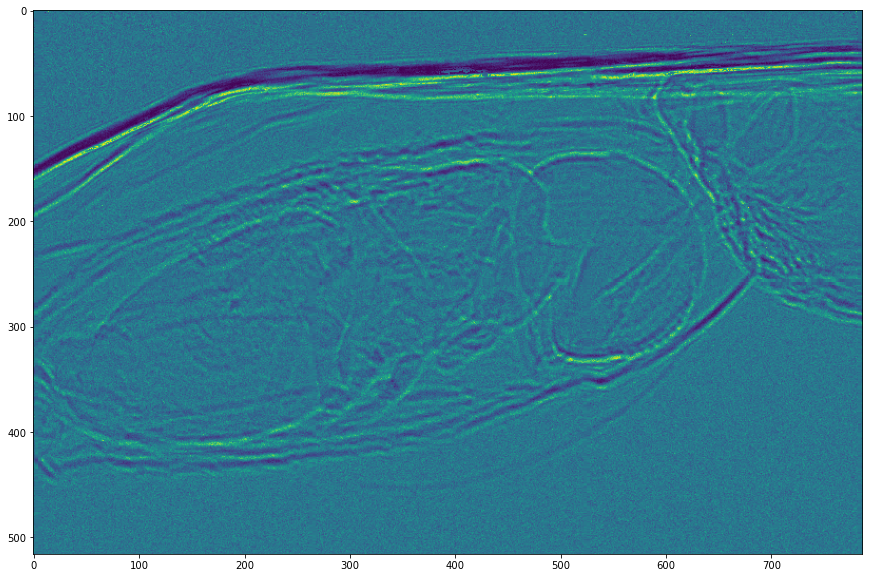

In [17]:
plt.figure(figsize=(16, 10))
plt.imshow(a[750])